<a id="basicrnn"></a>
# Basic recurrence 


## Recurrent neural networks

### Motivation

Our unquestioned assumption (that even caused some headache in the prior data preparation case) is that for every neural model the dimensionality of the input has to be fixed, or only small deviations were allowed (for example in ConvNets we could use some padding, but not too much).

What if my data is not of uniform length, dynamically sized - for example because it comes from a (time) series of non-fixed or unknown length?

Or as an alternative formulation of this: From  prior knowledge we know, that just as in case of ConvNets for spatial invariance, we have a time seris, that implies that has a temporal structure we would like to learn.

As defined before, we interpret our data as time series in the form of $\{x_{t_0}, x_{t_1}, x_{t_2} ... x_{t_n}\}$.

### Structure of recurrent networks - "classic" or "vanilla" RNN

We would like to define a neural network architecture, that in case of an input data point  $x_{t}$ can take into account the effect of prior datapoints without providing those as explicit inputs (as in the feedforward case), but as **(hidden) state**, using the activations of the NN itslef.

Till this point we only used the activation for backpropagation, but now we'll use it also for something else.

**Basic idea:**

<a href="https://cdn-images-1.medium.com/max/1400/1*lQ4izz9ZbhKYD8NClZpsmQ.png"><img src="https://drive.google.com/uc?export=view&id=197zCScRaBJypUb0giZzBh_0plHAOzlYJ"></a>

As a naive solution we could store the activations at $x_{t_-1}$ for all neurons and use a common $\lambda$ "dampening factor" before adding them to the activations arising at $x_{t}$

$$ f(x_t) = \sigma(w x_t +\lambda a_{t-1} + b)$$ 

This is not a complete recurrent network, but something along that direction (it's worth trying whether it works :-)

But if we have a complete neural architecture with weight matrices, why shouldn't we do this in a more clever way?

### Elman network

The first real recurrent network:

[Elman 1990](https://crl.ucsd.edu/~elman/Papers/fsit.pdf): 
Jeffrey L. Elman: Finding structure in time, Cognitive Science 14, p179-p211
<a href="https://cdn-images-1.medium.com/max/1400/1*E6OMkLY8vbPdJ7b5R27FQA.jpeg"><img src="https://drive.google.com/uc?export=view&id=17s60w9qBrwdrazopSAIPHjQ6ttiBgtTn"></a>

**The general notation for recurrent networks:**

**$$h_t=\sigma(Wx_t+Uh_{t-1})$$**

"Legend":

|Symbol| Meaning|
|:---|:---|
|$h_t$| "hidden state" at time $t$ |
|$\sigma$| activation function (typically sigmoid or tanh)|
|$x_t$| input at time $t$ |
|$W$| input to hidden weigth matrix|
|$U$| hidden to hidden weigth matrix|
|$h_{t-1}$| "hidden state" at time $t-1$ |


**In this model we learn two weigth matrices $W$ and $U$.**

Summary  [here](https://medium.com/lingvo-masino/introduction-to-recurrent-neural-network-d77a3fe2c56c).

## Backpropagation through time (BPTT)

Question: How can we teach recurrent neural networks?

Luckily enough, the gradient based methods we have learned are appropriate for this - only with a slight modification.

### "Unrolling"

In order to understand the gradient calculation of recurrent nets we can imagine RNN-s as deep feedforward neural nets "unrolled" in time.

<a href="https://cdn-images-1.medium.com/max/1400/1*icP_8Q-I87k4Nyq0vdSl8A.png"><img src="https://drive.google.com/uc?export=view&id=1BvAx4puhnqLu0rLM6-7ZV2qzSAFeQwO7"></a>

This is all the more useful, since traditionally we implement RNN-s in this "unrolled" way. Nowdays this is not necessarily true, or at least depends on the framework we utilize for training, since some of them solves it with iterations.

In the "unrolled" network $U$ and $W$ parameters are the same, so we can understand this as a form of "weight sharing", just as in case of ConvNets, but not through space, but through time.

Sensible description [here](https://machinelearningmastery.com/gentle-introduction-backpropagation-time/).

### Problems with this approach

In default case we calculate through the whole unrolled network for each and every timestep.

This has quite serious implications:
1. We have to "see" the whole data at once (very "un-streaming like")
2. The number of calculated gradients - thus the amount of calculation - rises exponentially with the length of the dataset. This easily makes training intractable.

<a id="vanish"></a>
# Exploding and vanishing gradients

(The hard problems)

<a href="http://www.wildml.com/wp-content/uploads/2015/10/rnn-bptt-with-gradients.png"><img src="https://drive.google.com/uc?export=view&id=1IOC6XYlMRWRADH04Wh8iDVG1gXjTdeQA" height=400 width=400></a>

But the exploding computational need is just only one part of the problems with RNNs. Since they are extremely deep (in temporal sense) the gradient flow being propagated backward **"vanishes"** most of the time. In practice it results in the effect of signals far away in the past to disappear, as well as for convergence to grind to a halt.

The flipside of this is the effect of **exploding gradients** where the gradient signal gets multiplied while moving backwards in time, getting practically infinite.

These problems in practice are the same as in case of very deep feedforward networks.

A good description can be found [here](http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/)

### Suggested solutions

#### Careful initialization

Multiple scholars, amongst them one of Hinton's famous collaborators Quoc Le suggested a solution for RNN-s composed of ReLU nodes whereby we initialize the $U$ matrix with a scaled version of the identity matrix.

<a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/e1a4218ab6975ad1809415aa168ab6371b91bafc"><a href="http://drive.google.com/uc?export=view&id=1RPPmiqzRPY6uU5n0FLFjPgLFFaV0zn-C"><img src="https://drive.google.com/uc?export=view&id=1m99E3knMZ4gmvD1UHlZiX-4jruXPVxy-" width=450></a></a>

Details can be found [here](https://arxiv.org/abs/1504.00941)

#### Gradient clipping

As the name implies, it is a procedure whereby we artificially limit, "clip" the gradients during backprop. This is kind of  a"brute force" and semi-effective solution.

<a href="http://drive.google.com/uc?export=view&id=1jK47FvUp7TcUlB2hC4rWDXoxfQNrqhRr"><img src="https://drive.google.com/uc?export=view&id=1MBc8Vx-1Iyeh0TwKxdKiJd37kn9bOyF9" heigth=300 width=300></a>

[Pascanu and Mikolov 2012](https://arxiv.org/pdf/1211.5063.pdf)


#### Teacher forcing

Originally, the concept was to let the hidden state of the network "travel" in time, so that during the learning procedure the network can learn to memorize relevant data. In practice, if we always feed back the prediction of the network to itself, it can "drift away" from target.

Here is where teacher forcing comes in:

"Teacher forcing works by using the **actual or expected output from the training dataset** at the current time step $y_t$ as input in the next time step $X_{t+1}$, **rather than the output generated by the network $\hat{y_t}$**."

<a href="http://cnyah.com/2017/11/01/professor-forcing/non-teacher-teacher-forcing.png"><img src="https://drive.google.com/uc?export=view&id=1zfWZRKEeHRevsa7l3PABGknZIl5TwfOh" width=45%></a>

Though in practice this makes convergence easier, but as a tradeoff it also limits the usage of memory capacity. It can work well with unbounded memory capacity models (see later).

For it to work it is necessary for the data to be defined in each step.

It can be considered a move away from the Recursive Multi-step Forecast strategy.

A good walkthrough of teacher forcing can be found [here](https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/).

#### Truncated BPTT

The main idea of this approach is that we should not be so fanaticly following signals back into the past, we can do $k1$ steps of forward passes, then do backprop only for the last $k2$ steps back in time, that is:
- We show $k1$ steps for the network
- We unroll the net and calculate $k2$ steps back and aggregate gradients
- We roll up the net and update weigths

**Two parameters:**
- $k1$ decides how many forward passes happen between backprops (kind of "batch size") and influences the speed of training (as well as many other factors, **for the newest research in regard to batch size see: [Smith, Kindermans, Ying and Lee 2017](https://arxiv.org/abs/1711.00489)**
- $k2$ influences the temporal depth of backprop. If too small, our "window" will not contain all relevant timesteps, if too big, gradients can vanish.

A nice summary again [here](https://machinelearningmastery.com/gentle-introduction-backpropagation-time/).

**Notice, that we could not effectively get rid of those ugly windows!!**

If someone would like to analyse a TensorFlow RNN implementation in detail, it can be done [here](https://www.kdnuggets.com/2017/04/build-recurrent-neural-network-tensorflow.html).

##### Fair warning:

Though BPTT would be a theoretically more sound solution, practically it is quite unfeasible. And event he truncated version is implemented sometimes in really strange ways, eg. not letting you control over $k1$ and $k2$ separately, so in practice, much of the potential of LSTM-s may get "sabotaged".

For example you can read about the struggles with Truncated BPTT in Keras [here](https://machinelearningmastery.com/truncated-backpropagation-through-time-in-keras/). 


<a id="lstm"></a>
# Long short-term memory networks (LSTM)

Get ready to be Schmidhubered! :-)

<a href="https://www.xing.com/img/custom/content/klartext/asset_images/images/000/157/804/x137/image.png?1453288186"><img src="https://drive.google.com/uc?export=view&id=1Ea5cmpxJnHZmZTPNO2DwVr7rfxMAw_wi"></a>

Or more famously [Hochreiter and Schmidhuber 1997](http://www.bioinf.jku.at/publications/older/2604.pdf), in which the heroes are strongly inspired by human short term memory, and would like to create a network which can store signals for arbitrary, but learned length of time, enabling it to effectively infinitely "memorize" them.

(The joke term "to be Schmidhubered" comes from the fact that Prof. Schmidhuber has a long time feud with the Hinton group, and he tries to diminish the importance of their findings, claiming that others - amongst them he-  invented key methods before the "deep learning conspiracy". Disturbingly he is sometimes even right. see [this](http://people.idsia.ch/~juergen/deep-learning-conspiracy.html) :-)

## Architecture

**Gold standard explanation: [Colah's Blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)** The personal blog of the researcher Chris Olah.

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png"><img src="https://drive.google.com/uc?export=view&id=1UOtmNeaimbcn3H7CBSeIUfOcjRaubXgY" heigth=300 width=600></a>

### Preliminaries

Cell state "travels" through the process.
<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png"><img src="https://drive.google.com/uc?export=view&id=1IQEqkYz9ThTT1p_9EnO1NJ8xVLQwRsDv"></a>

"Gates" are to be understood as combinations of non-linearities (sigmoid or tanh) and pointwise operations (addition or multiplication).

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png"><img src="https://drive.google.com/uc?export=view&id=1tUFbRRllulugrK5OBmPGBVidOnqUIMWF"></a>

**Some help: Let us imagine if a vector gets multiplied pointwise with something between 0 and 1, this is equivalent to "deleting" (0) or "leaving intact" (1) some parts of the data.**

### 1. step: What would we like to "forget"?

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png"><img src="https://drive.google.com/uc?export=view&id=1J1_LbATvWLASY4OJsJ95txk9SCWjeYHR"></a>

### 2. step: What and where would we like to store?

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png"><img src="https://drive.google.com/uc?export=view&id=1ZpIjdziGKlIacF4M7GpO9GRvxVPxGK7j"></a>

### 3. step: Update the cell state!

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png"><img src="https://drive.google.com/uc?export=view&id=1jjM4MSIqgqNIz69K4jQUZtVjzTskezF_"></a>

### 4. step: Choose and produce the output!

<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png"><img src="https://drive.google.com/uc?export=view&id=1_gjSEe6CW1yc_QTCPhGEqM5Bst3D0SId"></a>

#### Alternative explanation [here](http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/)

This may be worth reading through, since it shows in detail each vector's dimensionality.

#### Animated illustration

<a href="https://miro.medium.com/max/1425/1*GjehOa513_BgpDDP6Vkw2Q.gif"><img src="https://drive.google.com/uc?export=view&id=1w42nZqQKTl8Mqsc0PTTOk0GAyvNizixi" width=75%></a>
<a href="https://miro.medium.com/max/1425/1*TTmYy7Sy8uUXxUXfzmoKbA.gif"><img src="https://drive.google.com/uc?export=view&id=1pPO0OsgGRjJsjTCDSTJanmZMc_k7zKqn" width=75%></a>
<a href="https://miro.medium.com/max/1425/1*S0rXIeO_VoUVOyrYHckUWg.gif"><img src="https://drive.google.com/uc?export=view&id=1T5USGg1LHTFkWQcTVulrcfmH3GjbMWcm" width=75%></a>
<a href="https://miro.medium.com/max/1425/1*VOXRGhOShoWWks6ouoDN3Q.gif"><img src="https://drive.google.com/uc?export=view&id=1hsXLmHrT6pKG1iVr9Ccav4HrU7woBFuW" width=75%></a>

[source](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

## Properties

- "Unreasonably effective" Andrej Karpathy's famous blogpost [here](https://karpathy.github.io/2015/05/21/rnn-effectiveness/)


- Not jsut effective, but "Turing complete"

Based on this Jann LeCun (the pioneer of "backpropaganda" and big name in ConvNets) talks not just about "deep learning", but "differentiable computing". LSTM blocks combined - amongst themselves or ConvNets, seq2seq models or memory networks (see later) are making this position more and more plausible.)

- It's inner state can effectively summarize long sequences of signals

We can imagine it that way, as the final hidden state of activation of an LSTM at the end of a sequence is the dense vector representation summarizing the totality of singals for that sequence. This is a _huge_ advantage for us (for sequence classification or for more advanced operations - see seqseq class).

- Does not formally solve exploding gradients, but for that we have brute force grad clipping.

## LSTM as layers

+ An LSTM - how ever strange that may sound - can be considered to be a complete layer. The most important parameter of it is the "number of (memory) units", which is the length of the hidden state vector, thus, the memory capacity. **Warning: this does not have any relationship to input size, thus can be considered a freely chosen parameter.**
+ It is quite widespread to use multiple LSTM layers ("stacked LSTMs") -- as in the case of ConvNets the hope is, that the layers learn a hierarchy of abstract representations:

<a href="http://wenchenli.github.io/assets/img/GNMT_residual.png"><img src="https://drive.google.com/uc?export=view&id=1cbf6VvnPTkQwJZjv2jZfpC2-w3zxLSbq" width=60%></a>

(on the right side a network is shown with skip/residual connections!)

In this case it makes sense, that we do not only get on top of the LSTM a final prediction $h$ (or even prediction + inner state vector $c$) for a sequence, but **we ask it to output the whole sequence of predictions**, so that the next layer can also operate on full sequences. Please bear this in mind during implementation, since this can be a common source of failure.  

Also worth noting, that the practicality of multi layer LSTMs have been recently questioned by some researchers, since they aruge, that one layer of LSTM can learn nearly everything a multi layer one can in practice - given the right "treatment". See more [here]( https://arxiv.org/abs/1909.00021).

## Basic LSTM example

Let us go through a **basic** LSTM  example based on a [publicly available property manintenance dataset](# https://combed.github.io/).

**This is _not_ a full datascience project, only the demonstration of some data preparation and training concepts!**

In [13]:
!wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/Power.csv?inline=false -O Power.csv

--2020-05-27 19:05:42--  https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/Power.csv?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘Power.csv’

Power.csv               [  <=>               ]   2.98M  7.74MB/s    in 0.4s    

2020-05-27 19:05:43 (7.74 MB/s) - ‘Power.csv’ saved [3128452]



In [14]:
# Source: Dataset / Academic / Power sockets / 3

df = pd.read_csv("Power.csv", header=None)
df.columns = ["Timestamp","Power"]
df.head()

,Timestamp,Power
0,1.401595e+12,58.694874
1,1.401595e+12,58.465698
2,1.401595e+12,58.090099
3,1.401595e+12,58.260864
4,1.401595e+12,58.002567


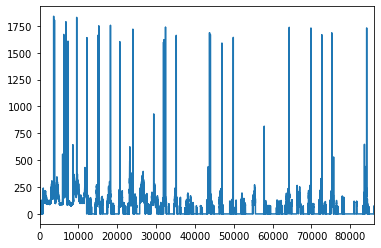

In [15]:
df.Power.plot()
plt.show()

In [16]:
print("Shape: ",df.shape)

Shape:  (86200, 2)


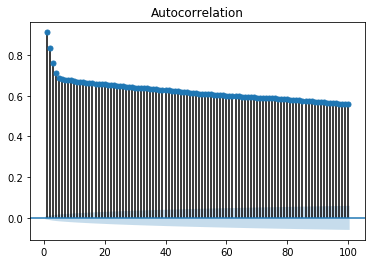

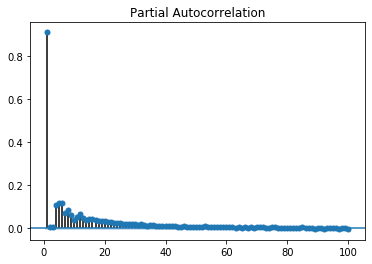

---


In [17]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(df.Power, lags=100, zero=False)
plot_pacf(df.Power, lags=100, zero=False)
plt.show()
print("---")

In [18]:
!pip install seglearn > /dev/null

In [19]:
VALID_AND_TEST_SIZE = 0.1
TIME_WINDOW=100
FORECAST_DISTANCE=1

### Doing train-valid-test split.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_else = train_test_split(df.Power, test_size=VALID_AND_TEST_SIZE*2, shuffle=False)
X_valid, X_test= train_test_split(X_else, test_size=0.5, shuffle=False)

### Rolling window

Using the wonderful [seglearn](https://dmbee.github.io/seglearn/) library to generate rolling windows from the training data.

In [21]:
from seglearn.transform import FeatureRep, SegmentXYForecast, last

segmenter = SegmentXYForecast(width=TIME_WINDOW, step=1, y_func=last, forecast=FORECAST_DISTANCE)

X_train_rolled, y_train_rolled,_=segmenter.fit_transform([X_train.values.flatten()],[X_train.values.flatten()])
X_valid_rolled, y_valid_rolled,_=segmenter.fit_transform([X_valid.values.flatten()],[X_valid.values.flatten()])
X_test_rolled, y_test_rolled,_=segmenter.fit_transform([X_test.values.flatten()],[X_test.values.flatten()])

In [22]:
X_train_rolled.shape, y_train_rolled.shape

((68860, 100), (68860,))

In [23]:
np.testing.assert_equal(X_train[:TIME_WINDOW].values,X_train_rolled[0])

In [24]:
np.testing.assert_equal(X_train[TIME_WINDOW-1+FORECAST_DISTANCE],y_train_rolled[0])

In [25]:
# Warning, Keras needs a 1D matrix, not a vector, so one must do:

X_train_rolled = X_train_rolled[:,:, np.newaxis]
X_valid_rolled = X_valid_rolled[:,:, np.newaxis]
X_test_rolled = X_test_rolled[:,:, np.newaxis]

In [46]:
#---- Hyperparams and settings ----

EPOCHS = 30
BATCH_SIZE = 200
LEARNING_RATE = 0.1
LSTM_CELL_SIZE = 300

In [47]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras import backend as be
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

column_count=1

be.clear_session()

input_layer = Input(shape=(TIME_WINDOW,column_count))

lstm_layer = LSTM(LSTM_CELL_SIZE)(input_layer)
dense_layer = Dense(1)(lstm_layer)

model = Model(inputs=input_layer, outputs=dense_layer)

optimizer = Adam(learning_rate=LEARNING_RATE)

model.compile(loss='mean_squared_error', optimizer=optimizer)

history = model.fit(x=X_train_rolled,y=y_train_rolled, batch_size=BATCH_SIZE, validation_data=(X_valid_rolled,y_valid_rolled), epochs=EPOCHS, verbose=1, shuffle=False)



Train on 68860 samples, validate on 8520 samples
Epoch 1/30
68860/68860 [==============================] - 48s 691us/sample - loss: 5884.7970 - val_loss: 6182.0641
Epoch 2/30
68860/68860 [==============================] - 39s 570us/sample - loss: 4643.1830 - val_loss: 5918.2724
Epoch 3/30
68860/68860 [==============================] - 39s 562us/sample - loss: 4318.2682 - val_loss: 5540.1538
Epoch 4/30
68860/68860 [==============================] - 39s 570us/sample - loss: 3836.3652 - val_loss: 5271.9356
Epoch 5/30
68860/68860 [==============================] - 39s 568us/sample - loss: 3569.0519 - val_loss: 5015.1448
Epoch 6/30
68860/68860 [==============================] - 39s 564us/sample - loss: 3232.4642 - val_loss: 4886.2774
Epoch 7/30
68860/68860 [==============================] - 39s 563us/sample - loss: 3105.7792 - val_loss: 4721.2178
Epoch 8/30
68860/68860 [==============================] - 39s 571us/sample - loss: 3018.6925 - val_loss: 4697.4197
Epoch 9/30
68860/68860 [=======

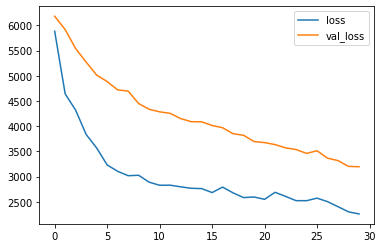

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [49]:
predictions = model.predict(X_test_rolled).flatten()

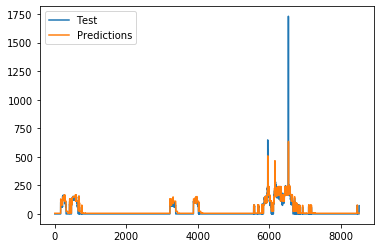

In [50]:
plt.close()
plt.plot(list(X_test[100:]), label="Test")
plt.plot(list(predictions), label="Predictions")
plt.legend()
plt.show()

## How is this model to be improved?

In many ways this model is too basic, needs heavy improvement.

1. Let it run further
2. Does not use regularization at all, Dropout should be added. The question is where to put it in RNNs, for this see [here](http://dx.doi.org/10.1109/ICDAR.2015.7333848) and [here](https://arxiv.org/abs/1512.05287)
3. Should use some data normalization, details can be found [here](https://machinelearningmastery.com/normalize-standardize-time-series-data-python/)
4. Usage of squared loss is also questionable
5. It does not solve the transfer of inner **states between minibatches** and on epoch begin (called "statefulness" and "warmup" respectively). Tips for **Warmup** [here](https://arxiv.org/pdf/1710.03222.pdf), for statefullness [here](https://stackoverflow.com/questions/38241410/tensorflow-remember-lstm-state-for-next-batch-stateful-lstm?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)
6. Hyperparameters could be optimized manually or with search techniques
7. Multiple LSTM layers can be stacked upon each-other

As said, a really basic model...